<a href="https://colab.research.google.com/github/Irtisam99/Fake-News-Detection-Model-/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAIVE_BAYES


In [1]:
# Imported the drive module to use it to connect with the personal drive and store it in the made subfolder of the colab content folder-'drive'

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Making an hidden folder named kaggle in the root directory
!mkdir -p ~/.kaggle


In [ ]:
cd ~/.kaggle/

/root/.kaggle


In [ ]:
pwd

'/root/.kaggle'

In [ ]:
# Copying the json file from the drive to the folder
!cp /content/drive/MyDrive/kaggle.json  ~/.kaggle/

In [ ]:
ls

kaggle.json


In [ ]:
# Changing the file permission to read and write for the user
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading the dataset zip in the specified folder path in the drive
!kaggle datasets download -d surekharamireddy/fake-news-detection -p "/content/drive/MyDrive/fake_news2"

Dataset URL: https://www.kaggle.com/datasets/surekharamireddy/fake-news-detection
License(s): copyright-authors
  0% 0.00/37.2M [00:00<?, ?B/s]
100% 37.2M/37.2M [00:00<00:00, 437MB/s]


In [ ]:
#Unziping the dataset
!unzip "/content/drive/MyDrive/fake_news2/fake-news-detection.zip" -d "/content/drive/MyDrive/fake_news2"

Archive:  /content/drive/MyDrive/fake_news2/fake-news-detection.zip
  inflating: /content/drive/MyDrive/fake_news2/train_news.csv  


In [2]:
import os

os.listdir('/content/drive/MyDrive/fake_news2')

['train_news.csv', 'fake-news-detection.zip']

In [3]:
import pandas as pd

path="/content/drive/MyDrive/fake_news2/train_news.csv"

df= pd.read_csv(path)
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [5]:
df['label'].value_counts()

,count
label,
1,10413
0,10387


In [6]:
print(df['news'].isnull().sum())
print(df['label'].isnull().sum())

39
0


In [9]:
df = df.dropna(subset=['news'])
print(df['news'].isnull().sum())
print(df['label'].value_counts())

0
label
0    10387
1    10374
Name: count, dtype: int64


In [10]:
print(df.duplicated(subset='news').sum())
print(df.duplicated(subset='label').sum())

375
20759


In [15]:
df = df.drop_duplicates(subset=['news'])
print(df.duplicated(subset='news').sum())

0


In [13]:
df['news'].sample(5)


,news
4172,38 UTC © Denis Balibouse / Reuters The NGOs t...
13512,Mass Fish Deaths: Millions Have Been Found Dea...
1486,"Technical explanations are out of favor, so he..."
11601,North Korea Ready for New Missile Launch Withi...
3808,"Poland is Empowering Women with Free, Nationwi..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20386 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20386 non-null  int64 
 1   id          20386 non-null  int64 
 2   headline    19868 non-null  object
 3   written_by  18533 non-null  object
 4   news        20386 non-null  object
 5   label       20386 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [16]:
df=df[['news','label']]

In [17]:
df.head()

,news,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1


### TEXT-PREPROCCESSING

In [19]:
# Case-Folding(lowercase)
df['text_lower']=df['news'].str.lower()

df[['news','text_lower']].head()

,news,text_lower
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...","washington — in sonny perdue’s telling, geo..."
1,HOUSTON — Venezuela had a plan. It was a ta...,houston — venezuela had a plan. it was a ta...
2,"Sunday on ABC’s “This Week,” while discussing ...","sunday on abc’s “this week,” while discussing ..."
3,"AUGUSTA, Me. — The beleaguered Republican g...","augusta, me. — the beleaguered republican g..."
4,Finian Cunningham has written extensively on...,finian cunningham has written extensively on...


In [21]:
#Punctuation Removal

import re

def removepunctuation(text):
  return re.sub(r'[^\w\s]','',text)

df['text_punc_removed']=df['text_lower'].apply(removepunctuation)

df[['text_lower','text_punc_removed']].head()

,text_lower,text_punc_removed
0,"washington — in sonny perdue’s telling, geo...",washington in sonny perdues telling georgi...
1,houston — venezuela had a plan. it was a ta...,houston venezuela had a plan it was a tact...
2,"sunday on abc’s “this week,” while discussing ...",sunday on abcs this week while discussing the ...
3,"augusta, me. — the beleaguered republican g...",augusta me the beleaguered republican gove...
4,finian cunningham has written extensively on...,finian cunningham has written extensively on...


In [22]:
# Word Tokenization
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
df['tokens']=df['text_punc_removed'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
df[['text_punc_removed','tokens']].sample(5)

,text_punc_removed,tokens
20687,president donald trump honored former presiden...,"[president, donald, trump, honored, former, pr..."
16935,go to article \nthis has to be one of the stup...,"[go, to, article, this, has, to, be, one, of, ..."
7050,email all hallows eve comes just once a year t...,"[email, all, hallows, eve, comes, just, once, ..."
18049,single woman genuinely loves getting shitfaced...,"[single, woman, genuinely, loves, getting, shi..."
19007,is now using their growing power to threaten...,"[is, now, using, their, growing, power, to, th..."


In [25]:
# Stopword Removal

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))

df['tokens_nostopwords']=df['tokens'].apply(
    lambda tokens:[word for word in tokens if word not in stop_words]
)

df[['tokens','tokens_nostopwords']].sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tokens,tokens_nostopwords
20596,"[james, comey, to, be, taken, out, knows, too,...","[james, comey, taken, knows, much, clintons, 0..."
11491,"[taking, advantage, of, almost, a, decade, of,...","[taking, advantage, almost, decade, political,..."
17257,"[philadelphia, follow, along, with, our, cover...","[philadelphia, follow, along, coverage, democr..."
8063,"[fortune, magazine, just, identified, google, ...","[fortune, magazine, identified, google, facebo..."
9483,"[for, decades, automakers, have, been, able, t...","[decades, automakers, able, count, fundamental..."


In [27]:
# Lemmatization

import spacy

lem=spacy.load('en_core_web_sm')

def lematize(token_list):
  text=" ".join(token_list)

  doc=lem(text)

  lemmas=[token.lemma_ for token in doc]
  return lemmas

df['lematized_tokens']=df['tokens_nostopwords'].apply(lematize)


In [28]:
print(df[['tokens_nostopwords', 'lematized_tokens']].sample(5))


                                      tokens_nostopwords  \
14336  [interview, quito, cut, assanges, access, inte...   
18188  [monday, 31, october, 2016, wrong, accused, tr...   
7855   [lambert, strether, corrente, tppttiptisa, tpp...   
15356  [veteran, political, strategist, pat, caddell,...   
14624  [friday, nationally, syndicated, radio, show, ...   

                                        lematized_tokens  
14336  [interview, quito, cut, assange, access, inter...  
18188  [monday, 31, october, 2016, wrong, accuse, try...  
7855   [lambert, strether, corrente, tppttiptisa, tpp...  
15356  [veteran, political, strategist, pat, caddell,...  
14624  [friday, nationally, syndicate, radio, show, c...  


In [48]:
# TF-IDF VECTORIZER

from sklearn.feature_extraction.text import TfidfVectorizer
df['clean_text']=df['lematized_tokens'].apply(lambda tokens:" ".join(tokens))

tfidf=TfidfVectorizer(max_features=10000)
X=tfidf.fit_transform(df['clean_text'])
y=df['label']


In [49]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print(y.head())


X shape: (20386, 10000)
y shape: (20386,)
0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64


In [50]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16308, 10000)
(4078, 10000)
(16308,)
(4078,)


In [51]:
#Training and Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [52]:
# Predicting
y_pred=model.predict(X_test)

In [53]:
# Evaluating
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("Accuracy : " ,accuracy_score(y_test,y_pred))
print("Precision : " ,precision_score(y_test,y_pred))
print("Recall : " ,recall_score(y_test,y_pred))
print("F1 Score : " ,f1_score(y_test,y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy :  0.898234428641491
Precision :  0.9294429708222812
Recall :  0.8613569321533924
F1 Score :  0.8941056391936718
Confusion Matrix:
 [[1911  133]
 [ 282 1752]]


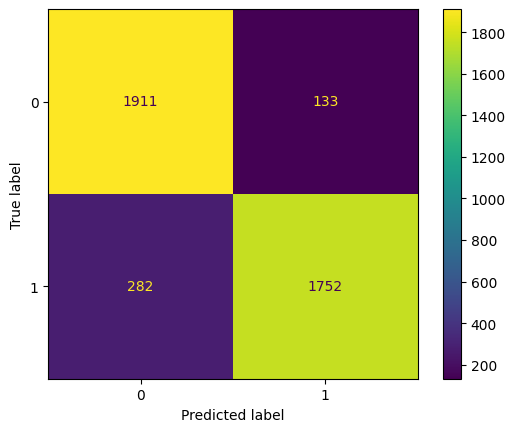

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)

cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=model.classes_)

cm.plot()
plt.show()


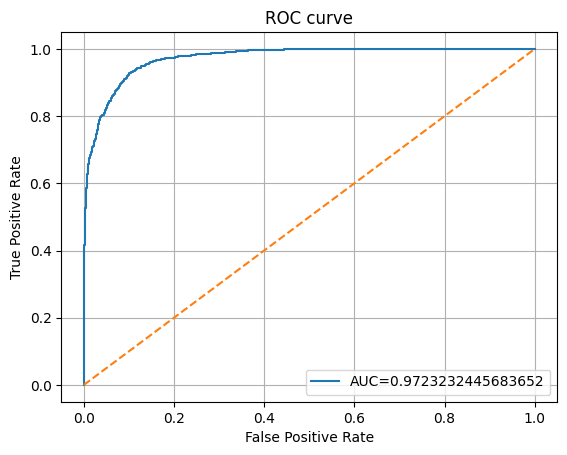

In [55]:
# ROC CURVE
from sklearn.metrics import roc_curve,roc_auc_score

y_prob=model.predict_proba(X_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_prob)
auc_score=roc_auc_score(y_test,y_prob)

plt.plot(fpr,tpr,label=f'AUC={auc_score}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid()
plt.show()

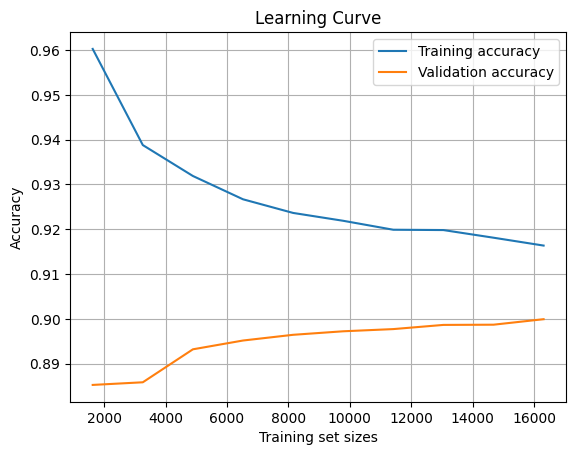

In [57]:
#Learning Curve

from sklearn.model_selection import learning_curve
import numpy as np

train_sizes,train_scores,test_scores=learning_curve(
    model,X,y,cv=5,scoring='accuracy',n_jobs=-1,train_sizes=np.linspace(0.1,1.0,10)

)

train_mean=train_scores.mean(axis=1)
test_mean=test_scores.mean(axis=1)

plt.plot(train_sizes,train_mean,label='Training accuracy')
plt.plot(train_sizes,test_mean,label='Validation accuracy')
plt.xlabel('Training set sizes')
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()